# Lukket system

In [23]:
import numpy as np
X = np.array([[0, 1], [1, 0]])
print("XX^dagger")
print(X @ X.conj().T)
print("X^daggerX")
print(X.T.conj() @ X)

XX^dagger
[[1 0]
 [0 1]]
X^daggerX
[[1 0]
 [0 1]]


In [ ]:
# Dotproduktet av X og X^dagger blir en identitetsmatrise
# X^dagger er inversen av X

In [18]:
print("The norm of the state |0> before applying X")
zero_ket = np.array([[1], [0]])
print(np.linalg.norm(zero_ket))
print("The norm of the state after applying X")
print(np.linalg.norm(X @ zero_ket))

The norm of the state |0> before applying X
1.0
The norm of the state after applying X
1.0


In [28]:
# Her ser man at to X-gater gir samme utgangspunkt. Resultatet blir null-ket og identitetsmatrisen til X
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.tools.visualization import circuit_drawer

backend_statevector = Aer.get_backend('statevector_simulator')
backend_unitary = Aer.get_backend('unitary_simulator')
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.x(0)
job = execute(circuit, backend_statevector)
print(job.result().get_statevector(circuit))
job = execute(circuit, backend_unitary)
print(job.result().get_unitary(circuit))

[1.+0.j 0.+0.j]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


# Lukkede systemer

In [29]:
def mixed_state(pure_state, visibility):
    density_matrix = pure_state @ pure_state.T.conj()
    maximally_mixed_state = np.eye(4)/2**2
    return visibility*density_matrix + (1-visibility)*maximally_mixed_state

y = np.array([[1],[0],[0],[1]])/np.sqrt(2)
print("Maximum visibility is a pure state:")
print(mixed_state(y, 1.0))
print("The state is still entangled with visibility 0.8:")
print(mixed_state(y, 0.8))
print("Entanglement is lost by 0.6:")
print(mixed_state(y, 0.6))
print("Barely any coherence remains by 0.2:")
print(mixed_state(y, 0.2))

Maximum visibility is a pure state:
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
The state is still entangled with visibility 0.8:
[[0.45 0.   0.   0.4 ]
 [0.   0.05 0.   0.  ]
 [0.   0.   0.05 0.  ]
 [0.4  0.   0.   0.45]]
Entanglement is lost by 0.6:
[[0.4 0.  0.  0.3]
 [0.  0.1 0.  0. ]
 [0.  0.  0.1 0. ]
 [0.3 0.  0.  0.4]]
Barely any coherence remains by 0.2:
[[0.3 0.  0.  0.1]
 [0.  0.2 0.  0. ]
 [0.  0.  0.2 0. ]
 [0.1 0.  0.  0.3]]


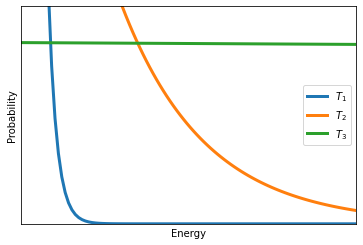

In [61]:
import matplotlib.pyplot as plt

temperatures = [.5, 5, 2000]
energies = np.linspace(0, 20, 100)
fig, ax = plt.subplots()
for i, T in enumerate(temperatures):
    probabilities = np.exp(-energies/T)
    Z = probabilities.sum()
    probabilities /= Z
    ax.plot(energies, probabilities, linewidth=3, label = "$T_" + str(i+1)+"$")
ax.set_xlim(0, 20)
ax.set_ylim(0, 1.2*probabilities.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Energy')
ax.set_ylabel('Probability')
ax.legend()